In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [247]:
data_path = './dataset/'

train = pd.read_csv(data_path+'train.csv')
test = pd.read_csv(data_path+'test.csv')

In [248]:
train.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68


In [249]:
test.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,05/10/2012,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,6.573,False
1,2,1,12/10/2012,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,6.573,False
2,3,1,19/10/2012,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,6.573,False
3,4,1,26/10/2012,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False
4,5,2,05/10/2012,70.27,3.617,6037.76,NaN,10.04,3027.37,3853.40,6.170,False


In [250]:
train = train.fillna(0)
test = test.fillna(0)

In [253]:
def holiday_to_num(feature):
    if feature == True:
        num = 1
    else:
        num = 0
    
    return num

In [219]:
train.shape, test.shape

((6255, 13), (180, 12))

In [220]:
train.drop(columns=['id'], inplace=True)
train.head()

,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,False,1643690.90
1,1,12/02/2010,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,True,1641957.44
2,1,19/02/2010,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,False,1611968.17
3,1,26/02/2010,46.63,2.561,0.0,0.0,0.0,0.0,0.0,8.106,False,1409727.59
4,1,05/03/2010,46.50,2.625,0.0,0.0,0.0,0.0,0.0,8.106,False,1554806.68


In [221]:
col_list = list(train.columns)
train_x = train[col_list[:-1]]
train_y = train[col_list[-1]]

In [222]:
train_y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6250     734297.87
6251     766512.66
6252     702238.27
6253     723086.20
6254     713173.95
Name: Weekly_Sales, Length: 6255, dtype: float64

In [223]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6255 non-null   int64  
 1   Date          6255 non-null   object 
 2   Temperature   6255 non-null   float64
 3   Fuel_Price    6255 non-null   float64
 4   Promotion1    6255 non-null   float64
 5   Promotion2    6255 non-null   float64
 6   Promotion3    6255 non-null   float64
 7   Promotion4    6255 non-null   float64
 8   Promotion5    6255 non-null   float64
 9   Unemployment  6255 non-null   float64
 10  IsHoliday     6255 non-null   bool   
dtypes: bool(1), float64(8), int64(1), object(1)
memory usage: 494.9+ KB


In [224]:
train_x.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      0
Promotion3      0
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
dtype: int64

In [225]:
cat_variable = ['Store', 'IsHoliday']

In [226]:
train_y.describe()

count    6.255000e+03
mean     1.047619e+06
std      5.654362e+05
min      2.099862e+05
25%      5.538695e+05
50%      9.604761e+05
75%      1.421209e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

<AxesSubplot:>

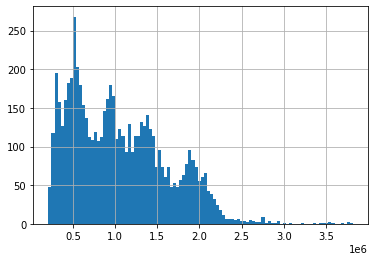

In [227]:
train_y.hist(bins=100)

In [228]:
train_x['Date'] = pd.to_datetime(train_x['Date'])
train['Date'] = pd.to_datetime(train['Date'])

c:\Users\bigcare\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/02/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\bigcare\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26/02/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\bigcare\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/03/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\bigcare\AppData\Local\Programs\Python\Python39\lib\site-pa

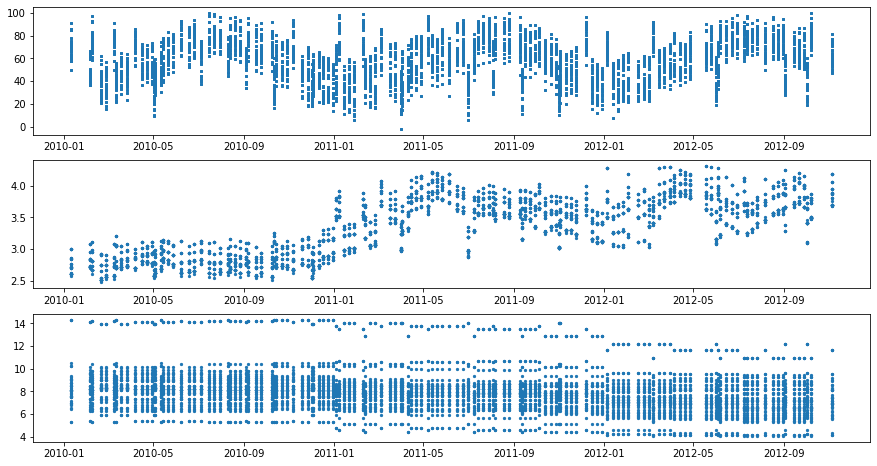

In [229]:
plt.figure(figsize=(15,8))
plt.subplot(311)
plt.scatter(x=train_x['Date'], y=train_x['Temperature'], marker='s', s=5)
plt.subplot(312)
plt.scatter(x=train_x['Date'], y=train_x['Fuel_Price'], s=5)
plt.subplot(313)
plt.scatter(x=train_x['Date'], y=train_x['Unemployment'], s=5)
plt.show()

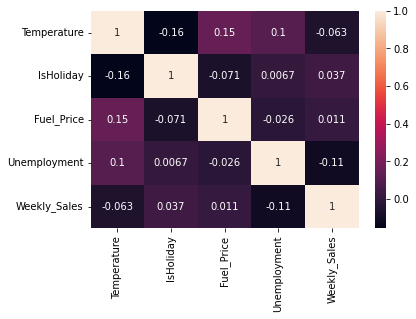

In [230]:
sns.heatmap(train[['Date', 'Temperature', 'IsHoliday', 'Fuel_Price', 'Unemployment', 'Weekly_Sales']].corr(), annot = True)
plt.show()

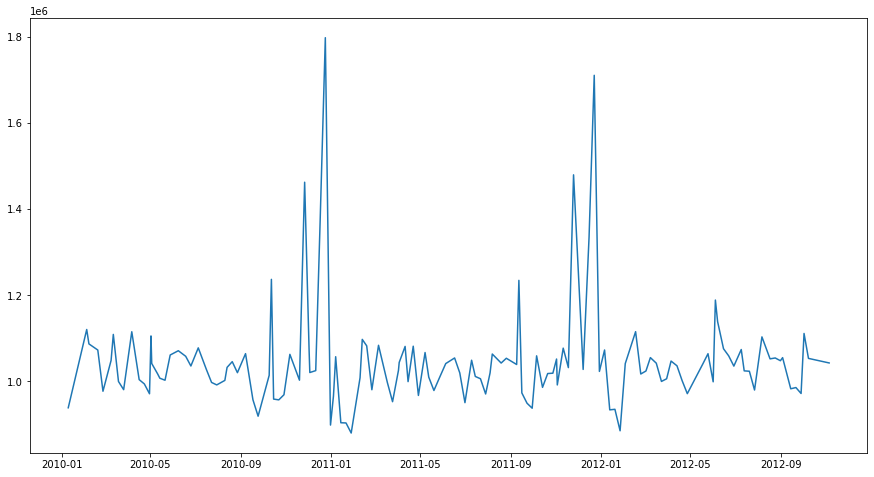

In [231]:
train_avg_sales = train.groupby(by=['Date'], as_index=False)['Weekly_Sales'].mean()

plt.figure(figsize=(15, 8))
plt.plot(train_avg_sales.Date, train_avg_sales.Weekly_Sales)
plt.show()

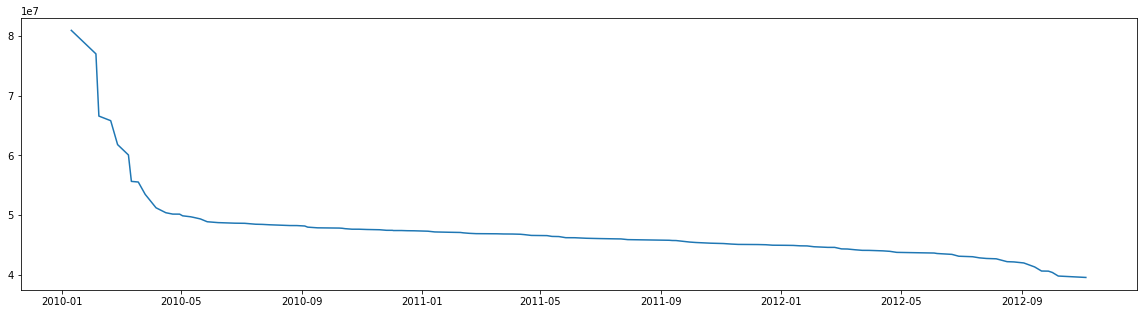

In [232]:
train_weekly_sales = train.groupby(by = ['Date'], as_index = False)['Weekly_Sales'].sum()
train_average_sales = train_weekly_sales.sort_values('Weekly_Sales', ascending = False)

plt.figure(figsize = (20, 5))
plt.plot(train_weekly_sales.Date, train_average_sales.Weekly_Sales)
plt.show()

In [233]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [234]:
date = train_x.Date

In [235]:
train_x = train_x.drop(columns=['Date']).copy()
train_x.values

array([[1, 42.31, 2.572, ..., 0.0, 8.106, False],
       [1, 38.51, 2.548, ..., 0.0, 8.106, True],
       [1, 39.93, 2.514, ..., 0.0, 8.106, False],
       ...,
       [45, 67.87, 3.948, ..., 5268.92, 8.684, False],
       [45, 65.32, 4.038, ..., 8670.4, 8.684, False],
       [45, 64.88, 3.997, ..., 3288.25, 8.684, False]], dtype=object)

In [239]:
train_x = train_x.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [243]:
train_x

array([[1, 42.31, 2.572, ..., 0.0, 8.106, False],
       [1, 38.51, 2.548, ..., 0.0, 8.106, True],
       [1, 39.93, 2.514, ..., 0.0, 8.106, False],
       ...,
       [45, 67.87, 3.948, ..., 5268.92, 8.684, False],
       [45, 65.32, 4.038, ..., 8670.4, 8.684, False],
       [45, 64.88, 3.997, ..., 3288.25, 8.684, False]], dtype=object)

In [241]:
train_x = torch.FloatTensor(train_x)
print(train_x)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.